In [ ]:
import cv2

cap = cv2.VideoCapture(0)
ret, frame = cap.read()

if ret:
    cv2.imshow("Captured Image", frame)
    cv2.imwrite("image1.jpg", frame)
else:
    print("無法讀取影像")

cap.release()
cv2.destroyAllWindows()

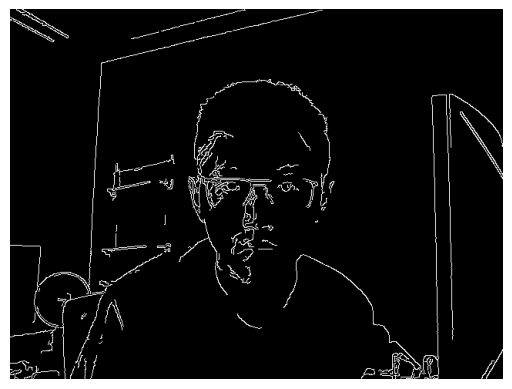

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 100, 200)

plt.imshow(edges, cmap='gray')
plt.axis('off')  # 不顯示坐標軸
plt.show()